In [1]:
!pip install numpy==1.16.1

We can extend on the network built in the last assignment by creating a recurrent neural network. In short, a recurrent neural network uses layers that act as a for loop that uses weights calculated in the past iteration of the loop, and tweaks them. Keras has built-in functionality for RNN.

In [2]:
from keras.layers import SimpleRNN

Using TensorFlow backend.


Let's apply this new layer to a simple neural network using the IMBD dataset.

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # Cut texts after this number of words (among top max_features most common words)
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

17465344/17464789 [==============================] - 0s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 941us/step - loss: 0.6457 - acc: 0.6102 - val_loss: 0.4800 - val_acc: 0.8018
Epoch 2/10
20000/20000 [===

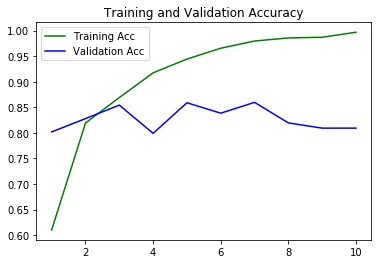

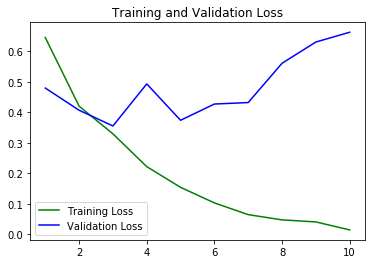

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

There seems to be a bit of over-training beginning around the 4th epoch, where the validation accuracy plateaus around 85% but the training accuracy continues to rise to almost 100%.

In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred_test = model.predict(x_test)
y_pred_val = (y_pred_test[:, 0] > 0.5).astype(int)

print(confusion_matrix(y_test.reshape(-1, 1), y_pred_val))
print(classification_report(y_test.reshape(-1, 1), y_pred_val))

[[ 9620  2880]
 [ 2103 10397]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79     12500
           1       0.78      0.83      0.81     12500

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



This model misclassifies ~5000 of the 25,000 articles. The lower accuracy could possible be attributed to the fact that we are only considering the first 500 words, rather than the full sequences. This gives the RNN a minimal amount of information to learn from.

Overall, SimpleRNN layers are a bit too simplistic for application in real world problems. Thus, we can opt for using one of the other recurrent layers provided by Keras, such as LSTM. LSTM stands for "Long-Short Term Memory". LSTM layers simply save calculated information from one layer, that can be accessed and used within others. Let's put it to use.

In [6]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.5084 - acc: 0.7647 - val_loss: 0.6182 - val_acc: 0.7234
Epoch 2/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.2951 - acc: 0.8831 - val_loss: 0.2804 - val_acc: 0.8854
Epoch 3/10
20000/20000 [==============================] - 80s 4ms/step - loss

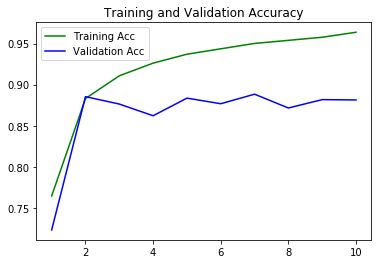

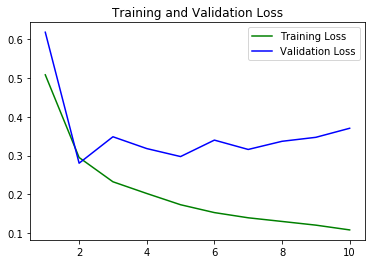

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

Still a bit of over-training, but the validation accuracy caps off closer to 90% this time, resulting in a smaller gap between training and validation accuracy.

In [8]:
y_pred_test = model.predict(x_test)
y_pred_val = (y_pred_test[:, 0] > 0.5).astype(int)

print(confusion_matrix(y_test.reshape(-1, 1), y_pred_val))
print(classification_report(y_test.reshape(-1, 1), y_pred_val))

[[11293  1207]
 [ 2354 10146]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86     12500
           1       0.89      0.81      0.85     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



While the LSTM network definitely performed better than the SimpleRNN, it is by no means ironclad. The main reason for this is simply that classifying these reviews can be solved in better ways than recurrent networks. However, recurrent networks like these can be extremely effective when dealing with far more difficult language processing, like voice recognition and machine translation.